# Text Classification Example using CNN and Keras
In this Example we will see how we can do the binary classification using CNN model with Keras framework.

**It is based on following references of convolution networks:**

* Convolutional Neural Networks for Sentence Classification (https://arxiv.org/pdf/1408.5882.pdf)
* A Convolutional Neural Network for Modelling Sentences (https://arxiv.org/pdf/1404.2188.pdf)
* Convolutional Neural Networks (http://web.stanford.edu/class/cs224n/readings/cs224n-2019-notes08-CNN.pdf)

**We have used the SMS Spam Data set in our example, which is available at the following location**
* SMS Spam Collection Data Set (https://archive.ics.uci.edu/ml/datasets/sms+spam+collection)

In this example our model will learn to classify a SMS message in spam or ham. 


In [1]:
# Download the SMS Spam data file if doesn't exist already
import os
import requests # This library is used to make requests to internet
import zipfile

data_file = "data/SMSSpamCollection"

# Download and unzip the data file in data directory in case it doesn't exists already
if not os.path.exists(data_file):
    data_file_dir = os.path.dirname(data_file)
    if not os.path.exists(data_file_dir): os.makedirs(data_file_dir)

    # Storing url of dataset
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
    r = requests.get(url, allow_redirects=True)
    zip_file_download = data_file_dir + '/smsspamcollection.zip'

    # Writing the content of above request to 'smsspamcollection.zip' file
    open(zip_file_download, 'wb').write(r.content)
    
    # Extract the zip file
    with zipfile.ZipFile(zip_file_download,"r") as zip_ref:
        zip_ref.extractall(data_file_dir)


In [2]:
from util import load_data_and_labels_from_csv_file, build_vocab, pad_sentences, text_to_sequence, save_vocab_json, generate_char_level_features

print("Loading data (labels and sentences) from the SMSSpamCollection file...")
labels, sentences = load_data_and_labels_from_csv_file(data_file)

print(labels[:5])
print(sentences[:5])

Loading data (labels and sentences) from the SMSSpamCollection file...
[0 0 1 0 0]
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 'U dun say so early hor... U c already then say...'
 "Nah I don't think he goes to usf, he lives around here though"]


In [3]:
import numpy as np

# Param defining max features consider in a sentence
params = {'max_chars_features': 500} 

# Generate Char features for every message
lines_chars_level_features = generate_char_level_features(sentences, params['max_chars_features'])
# Redefine the max_chars_features in case existing data contains the 
# max chars featues less then define one for all the messages
params['max_chars_features'] = max([len(lines) for lines in lines_chars_level_features])

# Convert to numpy array
lines_chars_level_features = np.array(lines_chars_level_features)
lines_chars_level_features[:5]

array([list(['g', 'o', ' ', 'u', 'n', 't', 'i', 'l', ' ', 'j', 'u', 'r', 'o', 'n', 'g', ' ', 'p', 'o', 'i', 'n', 't', ',', ' ', 'c', 'r', 'a', 'z', 'y', '.', '.', ' ', 'a', 'v', 'a', 'i', 'l', 'a', 'b', 'l', 'e', ' ', 'o', 'n', 'l', 'y', ' ', 'i', 'n', ' ', 'b', 'u', 'g', 'i', 's', ' ', 'n', ' ', 'g', 'r', 'e', 'a', 't', ' ', 'w', 'o', 'r', 'l', 'd', ' ', 'l', 'a', ' ', 'e', ' ', 'b', 'u', 'f', 'f', 'e', 't', '.', '.', '.', ' ', 'c', 'i', 'n', 'e', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'g', 'o', 't', ' ', 'a', 'm', 'o', 'r', 'e', ' ', 'w', 'a', 't', '.', '.', '.']),
       list(['o', 'k', ' ', 'l', 'a', 'r', '.', '.', '.', ' ', 'j', 'o', 'k', 'i', 'n', 'g', ' ', 'w', 'i', 'f', ' ', 'u', ' ', 'o', 'n', 'i', '.', '.', '.']),
       list(['f', 'r', 'e', 'e', ' ', 'e', 'n', 't', 'r', 'y', ' ', 'i', 'n', ' ', '2', ' ', 'a', ' ', 'w', 'k', 'l', 'y', ' ', 'c', 'o', 'm', 'p', ' ', 't', 'o', ' ', 'w', 'i', 'n', ' ', 'f', 'a', ' ', 'c', 'u', 'p', ' ', 'f', 'i', 'n', 'a', 'l', ' ', 't', 'k', 't', 's

In [4]:
# Build char vocabulary, assigning a unique index value to every char
# Special tokens <UNK/> for unknown chars, <PAD/> for padding a sentence

print("Build the char vocabulary, assigning a unique index value to every char")
vocabulary = build_vocab(lines_chars_level_features, max_vocab_size=10000)

import itertools 
# Print 10 Vocabulary items
for i, val in enumerate(itertools.islice(vocabulary, 10)):
    print(i, val, vocabulary[val])

Build the char vocabulary, assigning a unique index value to every char
0 <UNK/> [0, inf]
1 <PAD/> [1, inf]
2   [2, 81576]
3 e [3, 35072]
4 o [4, 29104]
5 t [5, 28037]
6 a [6, 25296]
7 i [7, 22514]
8 n [8, 21842]
9 s [9, 18957]


In [5]:
# Pad sentence
print("Padding sentences...")
x_text = pad_sentences(lines_chars_level_features, max_sequence_length=params['max_chars_features'])

# Get max sequence length, should be equal to max_char_features
seq_len = len(x_text[0]) 
print("The sequence length is: ", seq_len)
x_text[0][:30]

Padding sentences...
The sequence length is:  500


['g',
 'o',
 ' ',
 'u',
 'n',
 't',
 'i',
 'l',
 ' ',
 'j',
 'u',
 'r',
 'o',
 'n',
 'g',
 ' ',
 'p',
 'o',
 'i',
 'n',
 't',
 ',',
 ' ',
 'c',
 'r',
 'a',
 'z',
 'y',
 '.',
 '.']

In [6]:
# Represent sentence with char index, using char index to represent a sentence
x = text_to_sequence(x_text, vocabulary)
x[0]

array([20,  4,  2, 13,  8,  5,  7, 11,  2, 37, 13, 10,  4,  8, 20,  2, 21,
        4,  7,  8,  5, 27,  2, 18, 10,  6, 46, 17, 15, 15,  2,  6, 25,  6,
        7, 11,  6, 23, 11,  3,  2,  4,  8, 11, 17,  2,  7,  8,  2, 23, 13,
       20,  7,  9,  2,  8,  2, 20, 10,  3,  6,  5,  2, 19,  4, 10, 11, 14,
        2, 11,  6,  2,  3,  2, 23, 13, 22, 22,  3,  5, 15, 15, 15,  2, 18,
        7,  8,  3,  2,  5, 12,  3, 10,  3,  2, 20,  4,  5,  2,  6, 16,  4,
       10,  3,  2, 19,  6,  5, 15, 15, 15,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [7]:
# Shuffle data
#np.random.seed(1) #same shuffling each time
shuffle_indices = np.random.permutation(np.arange(len(labels)))
x = x[shuffle_indices]
labels = labels[shuffle_indices]
print(x[:3])
print(labels[:3])

[[ 7  2  6 ...  1  1  1]
 [19  3  8 ...  1  1  1]
 [12  4 19 ...  1  1  1]]
[0 0 0]


In [8]:
import keras
from keras.layers import Embedding, Reshape, Conv2D, MaxPool2D, Concatenate, Flatten, Dropout, Dense
from keras.models import Input, Model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

"""
## Build CNN model
"""
vocab_size_or_total_features = len(vocabulary) 

embed_dim = 300
filter_sizes = [3,4,5,6,7]
num_filters = 512
drop_out = 0.5

# this returns a tensor
print("Creating Model...")
inputs = Input(shape=(seq_len,), dtype='int32')
embedding = Embedding(input_dim=vocab_size_or_total_features, output_dim=embed_dim, input_length=seq_len)(inputs)
reshape = Reshape((seq_len,embed_dim,1))(embedding)

# Defining Conv and Maxpool Layer for each filter_size
maxpool_for_each_filter = []
for filter_size in filter_sizes:
    conv = Conv2D(num_filters, kernel_size=(filter_size, embed_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
    maxpool = MaxPool2D(pool_size=(seq_len - filter_size + 1, 1), strides=(1,1), padding='valid')(conv)
    maxpool_for_each_filter.append(maxpool)

# Concat all max pool layers
concatenate_maxpool = Concatenate(axis=1)(maxpool_for_each_filter)
flatten = Flatten()(concatenate_maxpool)
dropout = Dropout(drop_out)(flatten)
output = Dense(units=1, activation='sigmoid')(dropout)

model = Model(inputs=inputs, outputs=output) # Create model

model.summary()


Creating Model...
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 500, 300)     27000       input_1[0][0]                    
__________________________________________________________________________________________________
reshape (Reshape)               (None, 500, 300, 1)  0           embedding[0][0]                  
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 498, 1, 512)  461312      reshape[0][0]                    
_____________________________________________________________________

In [9]:
from keras.callbacks import ModelCheckpoint 
from keras.optimizers import Adam

checkpoint_path = "model/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

if not os.path.exists(checkpoint_dir): os.makedirs(checkpoint_dir)
# Save Vocabulary
vocab_file = checkpoint_dir + "/vocab.json"
save_vocab_json(vocab_file, vocabulary, params)

#checkpoint = ModelCheckpoint(filepath=checkpoint_path,  monitor='accuracy', verbose=1, save_best_only=True, mode='auto') # Create callback to save the weights
checkpoint = ModelCheckpoint(filepath=checkpoint_path,  monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto') # Create callback to save the weights
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=checkpoint_dir, histogram_freq=0)
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

epochs = 20
batch_size = 32
verbose = 1
validation_split = 0.2
print("Traning Model...")
history = model.fit(x, labels, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_split=validation_split, callbacks=[checkpoint, tensorboard_callback])


Traning Model...
Epoch 1/20
  1/140 [..............................] - ETA: 0s - loss: 0.6786 - accuracy: 0.5312WARNING:tensorflow:From /usr/local/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
140/140 [==============================] - ETA: 0s - loss: 0.3050 - accuracy: 0.8852
Epoch 00001: val_accuracy improved from -inf to 0.95785, saving model to model/cp.ckpt
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model/cp.ckpt/assets
140/140 [==============================] - 742s 5s/step - loss: 0.3050 - accuracy: 0.8852 - val_loss: 0.1593 - val_accuracy: 0.9578
Epoch 2/20
140/1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


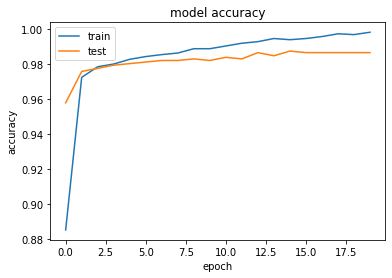

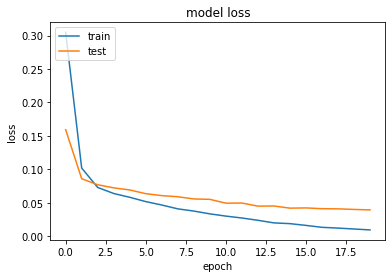

In [10]:
# Plot the accuracy, Val_accuracy and loss
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
# Prediction of given text

x_text = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 
"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."]

#labels, sentences = get_data_and_labels(lines)

lines_chars_level_features = generate_char_level_features(x_text, params['max_chars_features'])
lines_chars_level_features = np.array(lines_chars_level_features)

seq_len = params['max_chars_features'] 

x = pad_sentences(lines_chars_level_features, max_sequence_length=seq_len, is_max_sequence_length_modifiable=False)
x = text_to_sequence(x, vocabulary)


print("Generate predictions")
predictions = model.predict(x)
count = 0 
for text in x_text:
    print("Text is: \t", text)
    if (predictions[count] > 0.5):
        print("predicted spam with spam prob ", predictions[count])
    else:
        print("predicted ham with spam prob ", predictions[count])
    count += 1 



Generate predictions
Text is: 	 Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
predicted spam with spam prob  [0.99990714]
Text is: 	 I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.
predicted ham with spam prob  [0.00046477]
